## Importando as bibliotecas

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Selecionando as sheets que irei usar nesse projeto

In [2]:
sheet1 = pd.read_excel("BasedeDados.xlsx", skiprows = 4, usecols = 'C:J')
sheet1

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001.0,0.08,249.2,1.0,4.0,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001.0,0.10,162.4,1.0,4.0,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001.0,0.10,194.6,1.0,4.0,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002.0,0.10,201.6,2.0,1.0,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002.0,0.10,406.0,1.0,1.0,2019-01-21
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694.0,0.08,218.4,1.0,4.0,2018-12-02
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694.0,0.08,210.0,1.0,4.0,2018-12-05
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694.0,0.08,148.4,1.0,4.0,2019-08-01
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694.0,0.10,218.4,2.0,4.0,2019-11-25


In [3]:
sheet2 = pd.read_excel("BasedeDados.xlsx", sheet_name = "Sheet2", names = ['ProductID','Name','Size'])
sheet2

,ProductID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
...,...,...,...
68,0030e635639c898b323826589761cf233,Rick Morty,G
69,003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons,P
70,003128f981470c3e5a2e7445e4a771cd2,Homer Simpsons,M
71,003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons,G


In [4]:
sheet3 = pd.read_excel("BasedeDados.xlsx", sheet_name = "Sheet3", names = ['ClientID','City','State','DateOfBirth', 'Sex'])
sheet3

,ClientID,City,State,DateOfBirth,Sex
0,14001.0,Curitiba,PR,1985-06-28,Homem
1,14002.0,Florianópolis,SC,1987-01-10,Homem
2,14003.0,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004.0,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005.0,Florianópolis,SC,1969-04-07,Homem
...,...,...,...,...,...
13645,28689.0,Belo Horizonte,MG,1999-01-15,Homem
13646,28691.0,Belo Horizonte,BH,1956-02-07,Homem
13647,28692.0,Porto Alegre,RS,1985-10-19,Homem
13648,28694.0,Curitiba,PR,1982-10-22,Homem


In [5]:
# Juntando todas sheets em um dataframe

df1 = pd.merge(sheet1, sheet2, on=["ProductID"], how="inner")
df2 = pd.merge(df1, sheet3, on=["ClientID"], how = "inner")
df2

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,City,State,DateOfBirth,Sex
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001.0,0.08,249.2,1.0,4.0,2018-12-10,Tempestade,G,Curitiba,PR,1985-06-28,Homem
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001.0,0.10,162.4,1.0,4.0,2019-04-25,Thanos,G,Curitiba,PR,1985-06-28,Homem
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001.0,0.10,194.6,1.0,4.0,2019-07-17,Capitão América,P,Curitiba,PR,1985-06-28,Homem
3,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002.0,0.10,249.2,1.0,1.0,2019-03-28,Tempestade,G,Florianópolis,SC,1987-01-10,Homem
4,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002.0,0.10,201.6,2.0,1.0,2018-04-10,Wolverine,G,Florianópolis,SC,1987-01-10,Homem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,35253375b48f367b1d654e9b1d762ea7,001795ec6f1b187d37335e1c4704762e1,26353.0,0.10,148.4,1.0,2.0,2019-01-17,Mulher-Maravilha,P,Rio de Janeiro,RJ,1970-12-01,Homem
32749,59ac8c15c7c211589748d088b14d034c,001795ec6f1b187d37335e1c4704762e1,27006.0,0.10,148.4,1.0,4.0,2018-11-22,Mulher-Maravilha,P,Curitiba,PR,1995-09-19,Homem
32750,1d41e51a91eda6adf4505b3c15cf6068,001795ec6f1b187d37335e1c4704762e1,27480.0,0.10,148.4,1.0,3.0,2018-11-11,Mulher-Maravilha,P,Porto Alegre,RS,1965-10-09,Homem
32751,f1557b51d80a217105b6edae448b5548,001795ec6f1b187d37335e1c4704762e1,28348.0,0.10,148.4,1.0,4.0,2018-10-05,Mulher-Maravilha,P,Curitiba,PR,1963-08-09,Homem


In [6]:
# Criando coluna só de anos

df2['Year'] = df2['Date'].dt.strftime('%Y')
df2

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,City,State,DateOfBirth,Sex,Year
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001.0,0.08,249.2,1.0,4.0,2018-12-10,Tempestade,G,Curitiba,PR,1985-06-28,Homem,2018
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001.0,0.10,162.4,1.0,4.0,2019-04-25,Thanos,G,Curitiba,PR,1985-06-28,Homem,2019
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001.0,0.10,194.6,1.0,4.0,2019-07-17,Capitão América,P,Curitiba,PR,1985-06-28,Homem,2019
3,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002.0,0.10,249.2,1.0,1.0,2019-03-28,Tempestade,G,Florianópolis,SC,1987-01-10,Homem,2019
4,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002.0,0.10,201.6,2.0,1.0,2018-04-10,Wolverine,G,Florianópolis,SC,1987-01-10,Homem,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32748,35253375b48f367b1d654e9b1d762ea7,001795ec6f1b187d37335e1c4704762e1,26353.0,0.10,148.4,1.0,2.0,2019-01-17,Mulher-Maravilha,P,Rio de Janeiro,RJ,1970-12-01,Homem,2019
32749,59ac8c15c7c211589748d088b14d034c,001795ec6f1b187d37335e1c4704762e1,27006.0,0.10,148.4,1.0,4.0,2018-11-22,Mulher-Maravilha,P,Curitiba,PR,1995-09-19,Homem,2018
32750,1d41e51a91eda6adf4505b3c15cf6068,001795ec6f1b187d37335e1c4704762e1,27480.0,0.10,148.4,1.0,3.0,2018-11-11,Mulher-Maravilha,P,Porto Alegre,RS,1965-10-09,Homem,2018
32751,f1557b51d80a217105b6edae448b5548,001795ec6f1b187d37335e1c4704762e1,28348.0,0.10,148.4,1.0,4.0,2018-10-05,Mulher-Maravilha,P,Curitiba,PR,1963-08-09,Homem,2018


In [7]:
# Filtrando dataframe por um ano,nome do modelo,tamanho específico 

df3 = df2.loc[df2['Year']== '2019']
df4 = df3.loc[df3['Name']=='Iron Man']
df5 = df4.loc[df4['Size']== 'G']
df5

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,City,State,DateOfBirth,Sex,Year
65,2c76644ebdca47aa2d980e3b2714af13,002d4ea7c04739c130bb74d7e7cd16943,14228.0,0.10,210.0,1.0,3.0,2019-01-04,Iron Man,G,Porto Alegre,RS,1974-12-26,Homem,2019
287,6f118f6a730ce35b230974f295f743f9,002d4ea7c04739c130bb74d7e7cd16943,15478.0,0.08,210.0,1.0,4.0,2019-08-22,Iron Man,G,Curitiba,PR,1962-12-30,Homem,2019
497,c1213e8146aaff37acf16bfef1789d75,002d4ea7c04739c130bb74d7e7cd16943,16527.0,0.08,210.0,1.0,1.0,2019-06-02,Iron Man,G,Florianópolis,SC,1975-12-07,Homem,2019
558,4ba61a173049b183dab04f266855be13,002d4ea7c04739c130bb74d7e7cd16943,16728.0,0.10,210.0,1.0,1.0,2019-02-24,Iron Man,G,Florianópolis,SC,1962-08-19,Homem,2019
635,a69d0f3cfd16e940ead155695b5fb184,002d4ea7c04739c130bb74d7e7cd16943,17145.0,0.08,210.0,1.0,1.0,2019-12-20,Iron Man,G,Florianópolis,SC,1999-11-15,Homem,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28456,4e771842803751a695d042079930820e,002d4ea7c04739c130bb74d7e7cd16943,28506.0,0.08,210.0,1.0,3.0,2019-06-21,Iron Man,G,Porto Alegre,RS,1957-05-21,Homem,2019
28458,fe52796ecc672e9bd061049987e19829,002d4ea7c04739c130bb74d7e7cd16943,28526.0,0.10,210.0,1.0,9.0,2019-05-21,Iron Man,G,Belo Horizonte,MG,1972-11-03,Homem,2019
28461,46f0668d5961419489c708d57e9e99bb,002d4ea7c04739c130bb74d7e7cd16943,28581.0,0.10,210.0,1.0,4.0,2019-03-06,Iron Man,G,Curitiba,PR,1987-06-03,Homem,2019
28462,e9a673444938dfb3ee73bc31383f2921,002d4ea7c04739c130bb74d7e7cd16943,28627.0,0.10,210.0,1.0,1.0,2019-11-04,Iron Man,G,Florianópolis,SC,1973-04-16,Homem,2019


In [8]:
# Criando coluna de meses

df5['Mounth'] = df5['Date'].dt.strftime('%m')
df5

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,City,State,DateOfBirth,Sex,Year,Mounth
65,2c76644ebdca47aa2d980e3b2714af13,002d4ea7c04739c130bb74d7e7cd16943,14228.0,0.10,210.0,1.0,3.0,2019-01-04,Iron Man,G,Porto Alegre,RS,1974-12-26,Homem,2019,01
287,6f118f6a730ce35b230974f295f743f9,002d4ea7c04739c130bb74d7e7cd16943,15478.0,0.08,210.0,1.0,4.0,2019-08-22,Iron Man,G,Curitiba,PR,1962-12-30,Homem,2019,08
497,c1213e8146aaff37acf16bfef1789d75,002d4ea7c04739c130bb74d7e7cd16943,16527.0,0.08,210.0,1.0,1.0,2019-06-02,Iron Man,G,Florianópolis,SC,1975-12-07,Homem,2019,06
558,4ba61a173049b183dab04f266855be13,002d4ea7c04739c130bb74d7e7cd16943,16728.0,0.10,210.0,1.0,1.0,2019-02-24,Iron Man,G,Florianópolis,SC,1962-08-19,Homem,2019,02
635,a69d0f3cfd16e940ead155695b5fb184,002d4ea7c04739c130bb74d7e7cd16943,17145.0,0.08,210.0,1.0,1.0,2019-12-20,Iron Man,G,Florianópolis,SC,1999-11-15,Homem,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28456,4e771842803751a695d042079930820e,002d4ea7c04739c130bb74d7e7cd16943,28506.0,0.08,210.0,1.0,3.0,2019-06-21,Iron Man,G,Porto Alegre,RS,1957-05-21,Homem,2019,06
28458,fe52796ecc672e9bd061049987e19829,002d4ea7c04739c130bb74d7e7cd16943,28526.0,0.10,210.0,1.0,9.0,2019-05-21,Iron Man,G,Belo Horizonte,MG,1972-11-03,Homem,2019,05
28461,46f0668d5961419489c708d57e9e99bb,002d4ea7c04739c130bb74d7e7cd16943,28581.0,0.10,210.0,1.0,4.0,2019-03-06,Iron Man,G,Curitiba,PR,1987-06-03,Homem,2019,03
28462,e9a673444938dfb3ee73bc31383f2921,002d4ea7c04739c130bb74d7e7cd16943,28627.0,0.10,210.0,1.0,1.0,2019-11-04,Iron Man,G,Florianópolis,SC,1973-04-16,Homem,2019,11


In [9]:
# Números de venda nos meses de 2019

sales = df5.groupby(by='Mounth').Quantity.sum()
sales

Mounth
01    30.0
02    22.0
03    27.0
04    31.0
05    35.0
06    56.0
07    38.0
08    65.0
09    25.0
10    30.0
11    26.0
12    56.0
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='Mounth'>

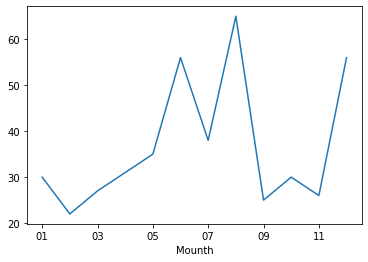

In [16]:
# Gráfico representando o números de venda durante o ano de 2019 

sales.plot()

In [21]:
# Criando colunas mês,valor sem disconto, e valor com disconto  

df3['Mounth'] = df3['Date'].dt.strftime('%m')
df3['Value'] = df3['UnitPrice'] * df3['Quantity']
df3['ValueDisc'] = df3['Value']-( df3['Value'] * df3['Discount'])
df3

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Name,Size,City,State,DateOfBirth,Sex,Year,Mounth,Value,valueDisc,ValueDisc
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001.0,0.10,162.4,1.0,4.0,2019-04-25,Thanos,G,Curitiba,PR,1985-06-28,Homem,2019,04,162.4,146.160,146.160
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001.0,0.10,194.6,1.0,4.0,2019-07-17,Capitão América,P,Curitiba,PR,1985-06-28,Homem,2019,07,194.6,175.140,175.140
3,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002.0,0.10,249.2,1.0,1.0,2019-03-28,Tempestade,G,Florianópolis,SC,1987-01-10,Homem,2019,03,249.2,224.280,224.280
5,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002.0,0.10,406.0,1.0,1.0,2019-01-21,Naruto,G,Florianópolis,SC,1987-01-10,Homem,2019,01,406.0,365.400,365.400
6,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002.0,0.08,261.8,1.0,1.0,2019-08-14,Ciclope,G,Florianópolis,SC,1987-01-10,Homem,2019,08,261.8,240.856,240.856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32735,4e9cb71601575577f2208d3aedf933cc,001795ec6f1b187d37335e1c4704762e1,20310.0,0.10,148.4,1.0,3.0,2019-09-26,Mulher-Maravilha,P,Porto Alegre,RS,1980-07-16,Homem,2019,09,148.4,133.560,133.560
32740,c07ddbce3f94a335544e744012c52f0f,001795ec6f1b187d37335e1c4704762e1,23597.0,0.10,148.4,1.0,2.0,2019-01-23,Mulher-Maravilha,P,Rio de Janeiro,RJ,1991-12-24,Mulher,2019,01,148.4,133.560,133.560
32744,c4de2c9027b739331dbfaebac612e662,001795ec6f1b187d37335e1c4704762e1,24746.0,0.08,148.4,1.0,4.0,2019-08-14,Mulher-Maravilha,P,Curitiba,PR,1956-12-18,Homem,2019,08,148.4,136.528,136.528
32746,4d59685727333d1dbcbbcfd3f0795423,001795ec6f1b187d37335e1c4704762e1,26086.0,0.10,148.4,1.0,22.0,2019-09-26,Mulher-Maravilha,P,Belo Horizonte,BH,1990-10-03,Homem,2019,09,148.4,133.560,133.560


In [22]:
# Somatório de ganhos por mês

total = df3.groupby(by='Mounth').ValueDisc.sum()
total

Mounth
01    210849.660
02    168483.420
03    285083.820
04    257972.400
05    283353.840
06    454739.992
07    242757.900
08    456192.856
09    256809.420
10    225986.040
11    248448.060
12    440503.728
Name: ValueDisc, dtype: float64

In [23]:
total.describe()

count        12.000000
mean     294265.094667
std       99304.561130
min      168483.420000
25%      238564.935000
50%      257390.910000
75%      323938.797000
max      456192.856000
Name: ValueDisc, dtype: float64

In [24]:
# Somatório de ganhos por loja

totalStore = df3.groupby(by='StoreID').ValueDisc.sum()
totalStore

StoreID
1.0     900116.560
2.0     723401.616
3.0     668055.752
4.0     560306.096
7.0     384675.676
9.0     192494.652
22.0    102130.784
Name: ValueDisc, dtype: float64

# Store ID:
    1.0 = Florianópolis
    2.0 = Rio de Janeiro
    3.0 = Porto Alegre
    4.0 = Curitiba
    7.0 = São Paulo
    9.0 = Belo Horizonte
    22.0 = Online